In [1]:
from pathlib import Path
from zipfile import ZipFile
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def parse_zip_name(zip_path):
    name = zip_path.name
    parts = name.split('_')
    dataset = parts[0]
    model = parts[1]
    optimizer = parts[3]
    return {'dataset': dataset,
           'model': model,
           'optimizer': optimizer,
           'path': zip_path}

def get_results(result_path):
    zip_path_list = [i for i in result_path.iterdir() if i.suffix=='.zip']
    return [parse_zip_name(i) for i in zip_path_list]

def get_dataframe(result_dict: dict):
    with ZipFile(result_dict['path']) as result_zip:
        with result_zip.open('history.csv') as csv_file:
            return pd.read_csv(csv_file)
        
def pair_results(result_list_1, result_list_2):
    pairs = []
    for i in result_list_1:
        for j in result_list_2:
            if (i['dataset']==j['dataset']) and (i['model']==j['model']):
                pairs.append((i, j))
    return pairs

In [3]:
results_dir = Path('results')
gravity_dir = Path('gravity_benchmarks')
adam_dir = Path('adam_benchmarks')
vgg16_dir = Path('vgg16')
vgg19_dir = Path('vgg19')

gravity_vgg16_results = get_results(Path.joinpath(results_dir, gravity_dir, vgg16_dir))
gravity_vgg19_results = get_results(Path.joinpath(results_dir, gravity_dir, vgg19_dir))
adam_vgg16_results = get_results(Path.joinpath(results_dir, adam_dir, vgg16_dir))
adam_vgg19_results = get_results(Path.joinpath(results_dir, adam_dir, vgg19_dir))

gravity_results = gravity_vgg16_results + gravity_vgg19_results
adam_results = adam_vgg16_results + adam_vgg19_results

In [4]:
pairs = pair_results(gravity_results, adam_results)

In [5]:
pair_dfs = [(get_dataframe(i), get_dataframe(j)) for i, j in pairs]

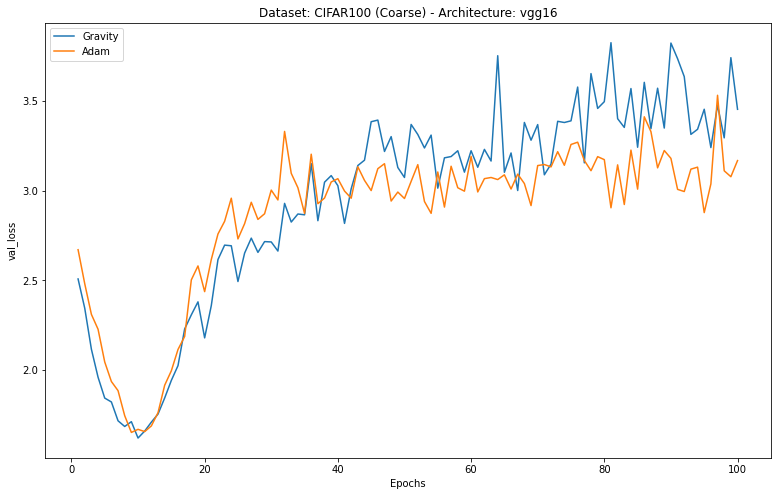

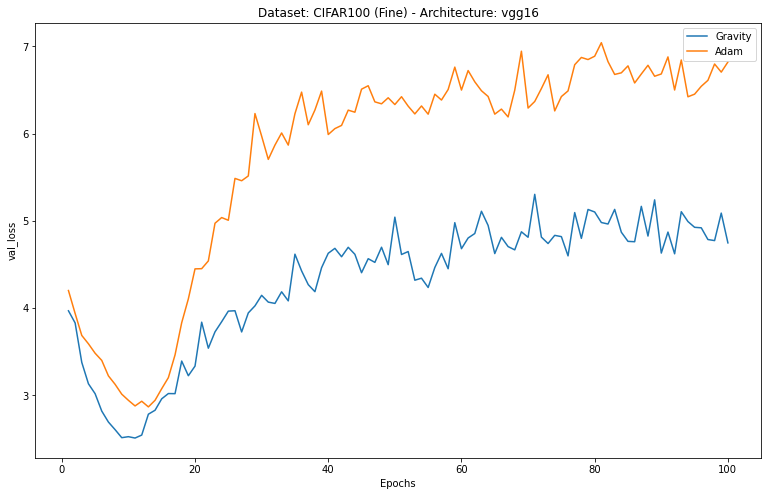

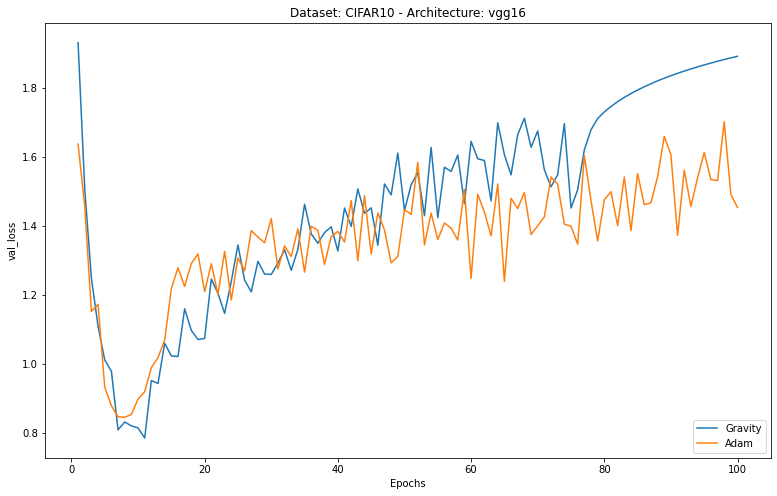

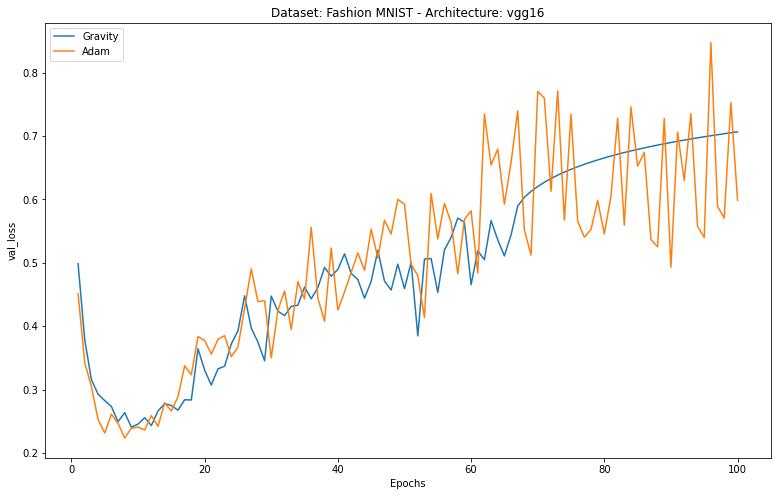

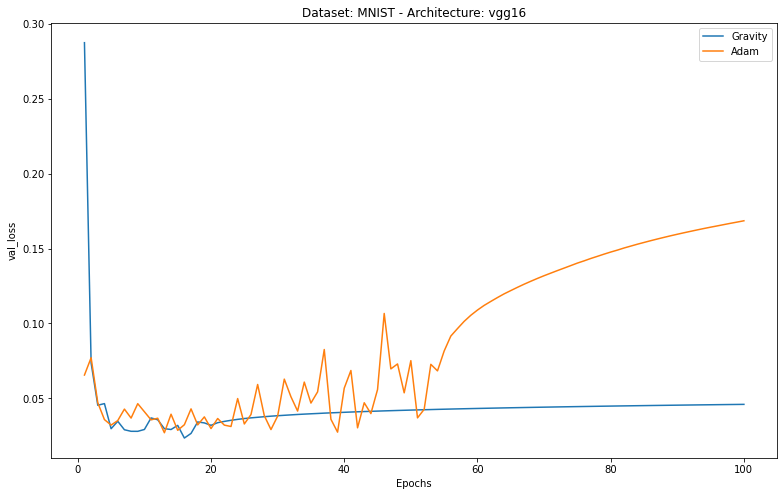

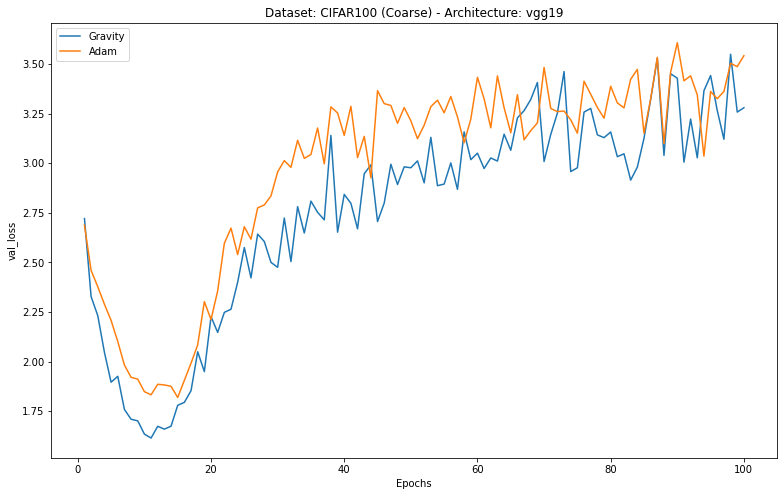

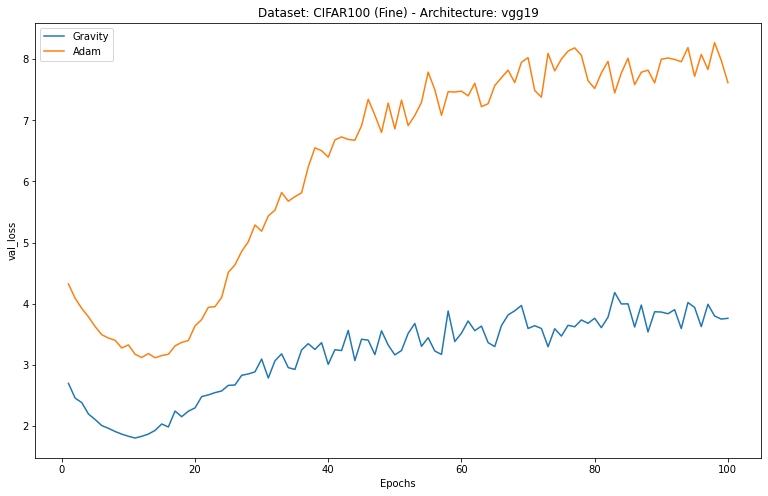

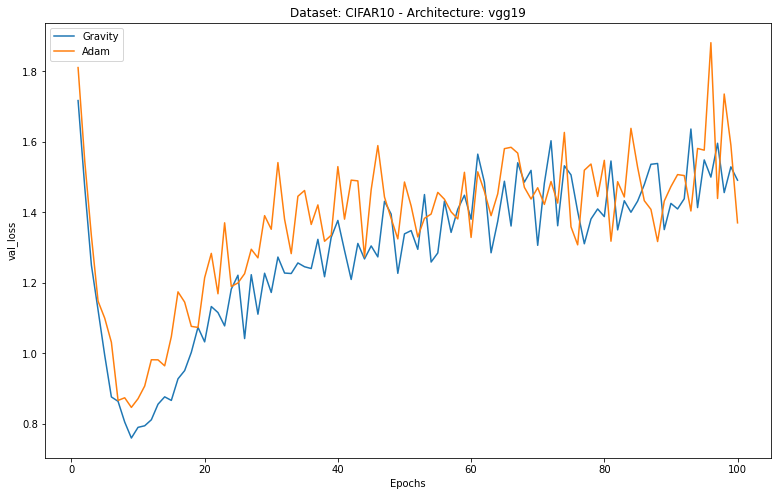

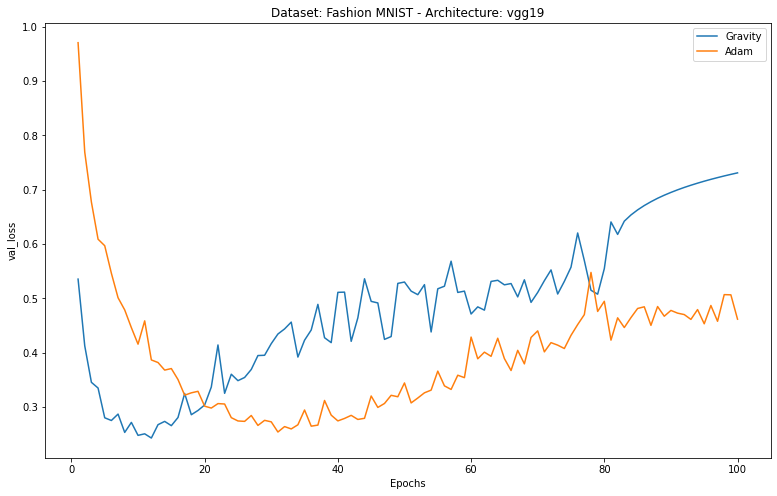

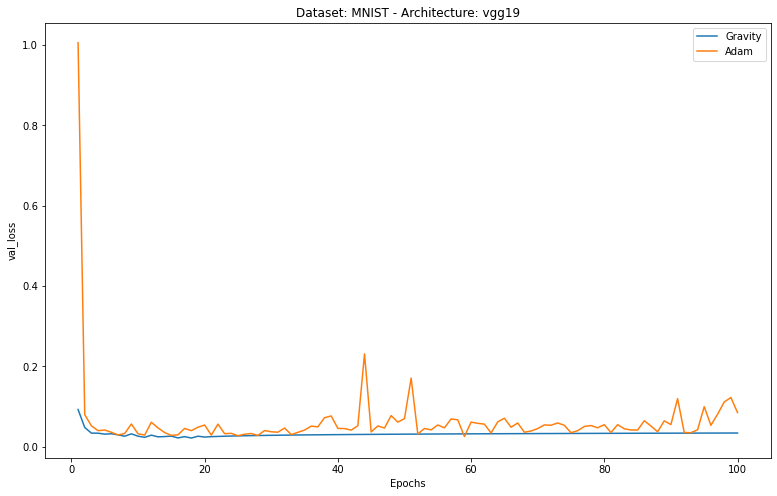

In [13]:
data = 'val_loss'
for index in range(len(pairs)):
    fig, ax = plt.subplots(nrows=1, ncols=1)
    fig.set_size_inches(13, 8)
    for df, info in zip(pair_dfs[index], pairs[index]):
        ax.plot(df['epochs'], df[data], label=info['optimizer'])
        title = f"Dataset: {info['dataset']} - Architecture: {info['model']}"
        ax.set_title(title)
        ax.set_xlabel('Epochs')
        ax.set_ylabel(data)
        ax.legend()
    plt.show()